In [4]:
import pyodbc
import pandas as pd

conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=./Databases/aenc.accdb;'
)
cnxn = pyodbc.connect(conn_str)
crsr = cnxn.cursor()
for table_info in crsr.tables(tableType='TABLE'):
    print(table_info.table_name)

bonus
customer
department
employee
product
region
sales_order
sales_order_item
state


In [5]:
aenc_df_product = pd.read_sql_query("SELECT * FROM product",cnxn)
aenc_df_bonus = pd.read_sql_query("SELECT * FROM bonus",cnxn)
aenc_df_department = pd.read_sql_query("SELECT * FROM department",cnxn)
aenc_df_employee = pd.read_sql_query("SELECT * FROM employee",cnxn)
aenc_df_customer = pd.read_sql_query("SELECT * FROM customer",cnxn)
aenc_df_region = pd.read_sql_query("SELECT * FROM region",cnxn)
aenc_df_sales_order = pd.read_sql_query("SELECT * FROM sales_order",cnxn)
aenc_df_sales_order_item = pd.read_sql_query("SELECT * FROM sales_order_item",cnxn)
aenc_df_state = pd.read_sql_query("SELECT * FROM state",cnxn)

C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\2746786233.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aenc_df_product = pd.read_sql_query("SELECT * FROM product",cnxn)
C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\2746786233.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aenc_df_bonus = pd.read_sql_query("SELECT * FROM bonus",cnxn)
C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\2746786233.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aenc_df_department = pd.read_sql_query("SELECT * FROM department"

In [7]:
DB = {'servername': 'LAPTOP-JCB37LKM\SQLEXPRESS',
      'database': 'NorthWind'}

export_conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+ DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\2488587140.py:1: SyntaxWarning: invalid escape sequence '\S'
  DB = {'servername': 'RAMCO\SQLEXPRESS',


In [ ]:
DB2 = {'servername': 'RAMCO\SQLEXPRESS',
      'database': 'AdventureWorks2019'}

export_conn_adventurewors = pyodbc.connect('DRIVER={SQL Server};SERVER='+ DB2['servername'] + ';DATABASE=' + DB2['database'] + ';Trusted_Connection=yes')

In [ ]:
adv_df_product = pd.read_sql_query("SELECT ProductID,Name,ProductSubcategoryID from Production.Product",export_conn_adventurewors)
adv_df_product_subcategory = pd.read_sql_query("SELECT ProductSubcategoryID,Name,ProductCategoryID from Production.ProductSubcategory",export_conn_adventurewors)
adv_df_product_category = pd.read_sql_query("SELECT Name,ProductCategoryID from Production.ProductCategory",export_conn_adventurewors)

C:\Users\jboek\AppData\Local\Temp\ipykernel_20860\4184286982.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  adv_df_product = pd.read_sql_query("SELECT ProductID,Name,ProductSubcategoryID from Production.Product",export_conn_adventurewors)
C:\Users\jboek\AppData\Local\Temp\ipykernel_20860\4184286982.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  adv_df_product_subcategory = pd.read_sql_query("SELECT ProductSubcategoryID,Name,ProductCategoryID from Production.ProductSubcategory",export_conn_adventurewors)
C:\Users\jboek\AppData\Local\Temp\ipykernel_20860\4184286982.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI 

In [ ]:
nw_df_product = pd.read_sql_query("SELECT * from Products",export_conn)
nw_df_category = pd.read_sql_query("SELECT CategoryID,CategoryName from Categories",export_conn)

C:\Users\jboek\AppData\Local\Temp\ipykernel_20860\425355533.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nw_df_product = pd.read_sql_query("SELECT * from Products",export_conn)
C:\Users\jboek\AppData\Local\Temp\ipykernel_20860\425355533.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nw_df_category = pd.read_sql_query("SELECT CategoryID,CategoryName from Categories",export_conn)


In [11]:
adv_product_merged = pd.merge(adv_df_product,adv_df_product_subcategory,on='ProductSubcategoryID',how='left')
adv_product_merged = pd.merge(adv_product_merged,adv_df_product_category,on='ProductCategoryID',how='left')

adv_product_merged = adv_product_merged.drop(['ProductSubcategoryID','ProductCategoryID'],axis=1)
adv_product_merged = adv_product_merged.rename(columns={
    'Name': 'Category',
    'Name_y': 'Subcategory',
    'Name_x': 'Name',

})
adv_product_merged['Source'] = 'AdventureWorks'
adv_product_final = adv_product_merged.reindex(columns=['ProductID', 'Name', 'Subcategory','Category','Source'])
adv_product_final

NameError: name 'adv_df_product' is not defined

In [ ]:
aenc_df_product_dropped = aenc_df_product.drop(['picture_name','quantity','prod_size','unit_price'],axis=1)
aenc_df_product_dropped['Source'] = 'AenC'
aenc_df_product_dropped = aenc_df_product_dropped.rename(columns={
    'id': 'ProductID',
    'name': 'Subcategory',
    'description': 'Name',
    'color': 'Color',

})
aenc_df_product_dropped['Category'] = aenc_df_product_dropped['Category'].replace('Clothes', 'Clothing')

aenc_df_product_final = aenc_df_product_dropped.reindex(columns=['ProductID', 'Name', 'Subcategory','Category','Source'])
aenc_df_product_final

,ProductID,Name,Subcategory,Category,Source
0,300,Tank Top,Tee Shirt,Clothing,AenC
1,301,V-neck,Tee Shirt,Clothing,AenC
2,302,Crew Neck,Tee Shirt,Clothing,AenC
3,400,Cotton Cap,Baseball Cap,Accessories,AenC
4,401,Wool cap,Baseball Cap,Accessories,AenC
5,500,Cloth Visor,Visor,Accessories,AenC
6,501,Plastic Visor,Visor,Accessories,AenC
7,600,Hooded Sweatshirt,Sweatshirt,Clothing,AenC
8,601,Zipped Sweatshirt,Sweatshirt,Clothing,AenC
9,700,Cotton Shorts,Shorts,Clothing,AenC


In [9]:
nw_df_product_dropped = nw_df_product.drop(['Discontinued','ReorderLevel','UnitPrice','UnitsInStock','QuantityPerUnit','UnitsOnOrder','SupplierID'],axis=1)
nw_df_product_merged = pd.merge(nw_df_product_dropped,nw_df_category,on='CategoryID',how='left')
nw_df_product_merged = nw_df_product_merged.drop('CategoryID',axis=1)
nw_df_product_merged['Source'] = 'NorthWind'
nw_df_product_merged['Category'] = 'Food'
nw_df_product_merged = nw_df_product_merged.rename(columns={
    'ProductName': 'Name',
    'CategoryName': 'Subcategory',
    
})
nw_df_product_final = nw_df_product_merged.reindex(columns=['ProductID', 'Name','Subcategory','Category','Source'])
nw_df_product_final

NameError: name 'nw_df_product' is not defined

In [10]:
combined_products = pd.concat([adv_product_final, aenc_df_product_final, nw_df_product_final]).reset_index(drop=True)
combined_products['ProductKey'] = combined_products.index + 1
combined_products = combined_products.reindex(columns=['ProductKey','ProductID', 'Name','Subcategory','Category','Source'])
combined_products



NameError: name 'adv_product_final' is not defined

In [23]:
DB = {'servername': 'RAMCO\SQLEXPRESS',
      'database': 'Northwind'}

export_conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+ DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\2488587140.py:1: SyntaxWarning: invalid escape sequence '\S'
  DB = {'servername': 'RAMCO\SQLEXPRESS',


C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\2490319243.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_df = pd.read_sql_query("SELECT OrderID, OrderDate, CustomerID FROM Orders", export_conn)
C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\2490319243.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_details_df = pd.read_sql_query("SELECT OrderID, ProductID, UnitPrice, Quantity, Discount FROM [Order Details]", export_conn)
C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\2490319243.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.pl

Average Order Value: 1525.0518533580353
Mean Squared Error: 778081.3328177205
R^2 Score: -0.00018301603366177588
          Actual   Predicted
1506  437.500000  566.514943
1917  713.999995  602.723366
889   331.312500  602.723366
306   848.000000  566.514943
1775  585.000000  566.514943


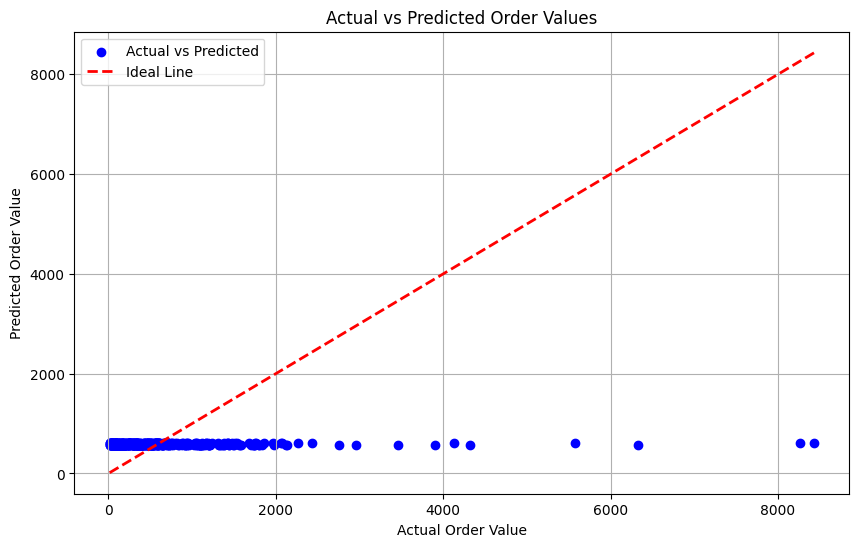

In [24]:
import pyodbc
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


# Fetching relevant data from Northwind database
orders_df = pd.read_sql_query("SELECT OrderID, OrderDate, CustomerID FROM Orders", export_conn)
order_details_df = pd.read_sql_query("SELECT OrderID, ProductID, UnitPrice, Quantity, Discount FROM [Order Details]", export_conn)

# Calculating the order value for each order
order_details_df['OrderValue'] = order_details_df['UnitPrice'] * order_details_df['Quantity'] * (1 - order_details_df['Discount'])

# Merging orders and order details to calculate average order value
merged_orders_df = pd.merge(orders_df, order_details_df, on='OrderID', how='left')
average_order_value = merged_orders_df.groupby('OrderID')['OrderValue'].sum().mean()
print(f"Average Order Value: {average_order_value}")

# Preparing data for regression analysis to understand the impact of discounts
merged_orders_df['DiscountApplied'] = merged_orders_df['Discount'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Encode categorical variables
label_encoders = {}
for column in ['DiscountApplied']:
    label_encoders[column] = LabelEncoder()
    merged_orders_df[column] = label_encoders[column].fit_transform(merged_orders_df[column])

# Feature selection
X = merged_orders_df[['DiscountApplied']]
y = merged_orders_df['OrderValue']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree Regression model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Optionally, show some predictions vs actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())


import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')
plt.xlabel('Actual Order Value')
plt.ylabel('Predicted Order Value')
plt.title('Actual vs Predicted Order Values')
plt.legend()
plt.grid(True)
plt.show()



<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\3881089772.py:8: SyntaxWarning: invalid escape sequence '\S'
  DB = {'servername': 'RAMCO\SQLEXPRESS',
C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\3881089772.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_df = pd.read_sql_query("SELECT OrderID, CustomerID FROM Orders", export_conn)
C:\Users\ramco\AppData\Local\Temp\ipykernel_2896\3881089772.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_details_df = pd.read_sql_query("SELECT OrderID, UnitPrice, Quantity, Discount FROM [Order Details]", export_conn)


Average Order Value: 1525.0518533580353


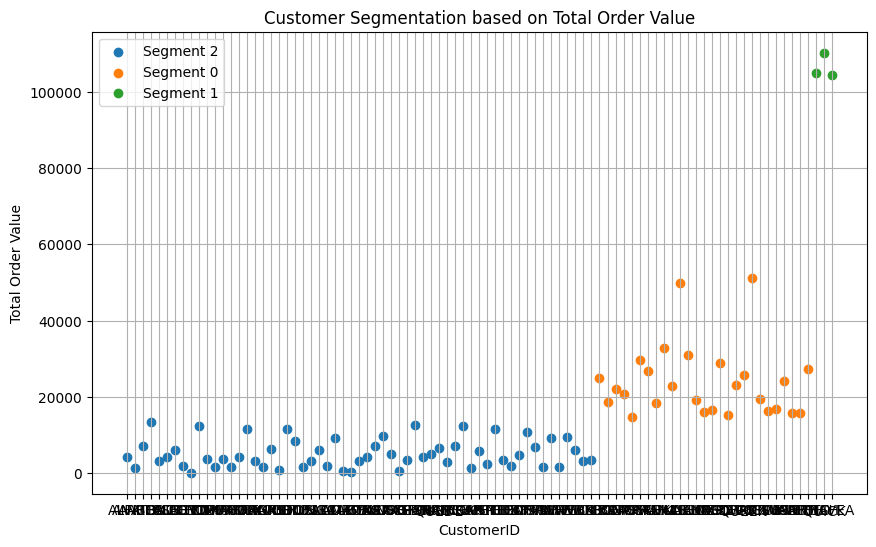

In [29]:
import pyodbc
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


DB = {'servername': 'RAMCO\SQLEXPRESS',
      'database': 'Northwind'}

export_conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+ DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')

# Ophalen van relevante data uit de database
orders_df = pd.read_sql_query("SELECT OrderID, CustomerID FROM Orders", export_conn)
order_details_df = pd.read_sql_query("SELECT OrderID, UnitPrice, Quantity, Discount FROM [Order Details]", export_conn)

# Berekenen van de totale orderwaarde voor elke order
order_details_df['OrderValue'] = order_details_df['UnitPrice'] * order_details_df['Quantity'] * (1 - order_details_df['Discount'])

# Samenvoegen van orders en orderdetails om de totale orderwaarde per order te berekenen
merged_orders_df = pd.merge(orders_df, order_details_df, on='OrderID', how='left')
average_order_value = merged_orders_df.groupby('OrderID')['OrderValue'].sum().mean()
print(f"Average Order Value: {average_order_value}")

# Klanten segmenteren op basis van de totale orderwaarde per klant
customer_order_value = merged_orders_df.groupby('CustomerID')['OrderValue'].sum().reset_index()
kmeans = KMeans(n_clusters=3, random_state=42).fit(customer_order_value[['OrderValue']])
customer_order_value['Segment'] = kmeans.labels_

# Visualiseren van de klantensegmenten
plt.figure(figsize=(10, 6))
for segment in customer_order_value['Segment'].unique():
    segment_data = customer_order_value[customer_order_value['Segment'] == segment]
    plt.scatter(segment_data['CustomerID'], segment_data['OrderValue'], label=f'Segment {segment}')
plt.xlabel('CustomerID')
plt.ylabel('Total Order Value')
plt.title('Customer Segmentation based on Total Order Value')
plt.legend()
plt.grid(True)
plt.show()
